In [1]:
import csv 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import keras
import seaborn as sns
sns.set(color_codes=True)

Using TensorFlow backend.


In [0]:
URL_tr = "https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv"

In [0]:
data = pd.read_csv(URL_tr, sep = '\t')

In [4]:
#create df of full sentences
fullSent= data.loc[data.groupby('SentenceId')['PhraseId'].idxmin()]
fullSent.head(25)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1
166,167,6,A comedy-drama of nearly epic proportions root...,4
198,199,7,"Narratively , Trouble Every Day is a plodding ...",1
213,214,8,"The Importance of Being Earnest , so thick wit...",3
247,248,9,But it does n't leave you with much .,1
259,260,10,You could hate it for the same reason .,1


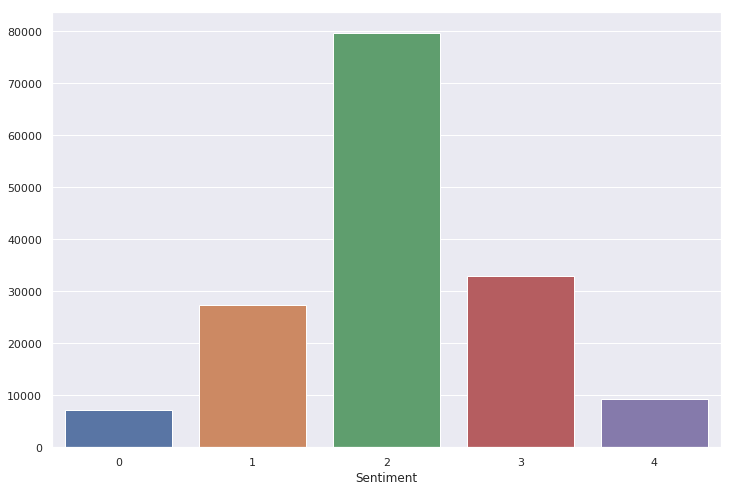

In [5]:
dist = data.groupby(["Sentiment"]).size()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

In [6]:
#number of unique sentences in the training dataset
print (len(data.groupby('SentenceId').nunique()))

8529


In [0]:
#Releasing unwanted variables
URL_tr = []

In [0]:
phrase = fullSent['Phrase']
sentiment = fullSent['Sentiment']

In [9]:
#Data Cleaning or Preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer 
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in phrase:
    sentence = sentence.lower() #Lowercase Conversion
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence) #Removing HTML Tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence) #Removing Punctuations
    
    #Removing Stop Words & Stemming
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')] 
    temp.append(words)
    
phrase = temp    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
print(phrase[1])

['quiet', 'introspect', 'entertain', 'independ', 'worth', 'seek']


In [11]:
sent = []
for row in phrase:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)

phrase = sent
print(phrase[1])

 quiet introspect entertain independ worth seek


In [12]:
print(phrase[0], sentiment[0])

#Splitting into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(phrase, sentiment, test_size=0.2,random_state=4)
                                               



 seri escapad demonstr adag good goos also good gander occasion amus none amount much stori 1


In [14]:
#TF-IDF Feature Extraction Method
tfidf_vectorizer = TfidfVectorizer(min_df=5,
                                 max_df=5,
                                  analyzer='word',
                                  strip_accents='unicode',
                                  ngram_range=(1,3),
                                  sublinear_tf=True,
                                  smooth_idf=True,
                                  use_idf=True,
                                  stop_words=None)
tfidf_vectorizer.fit(list(fullSent['Phrase']))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=5, max_features=None,
                min_df=5, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [15]:
train_tfidf = tfidf_vectorizer.transform(X_train)
test_tfidf = tfidf_vectorizer.transform(X_train)
print(train_tfidf.shape)
print(test_tfidf.shape)


(6823, 1481)
(6823, 1481)


In [0]:
rX_train  = train_tfidf.toarray()
X_train = rX_train.reshape((rX_train.shape[0],rX_train.shape[1],1))
print(X_train.shape)

rX_test  = test_tfidf.toarray()
X_test = rX_test.reshape((rX_test.shape[0],rX_test.shape[1],1))
print(X_test.shape)

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

In [13]:
#Bag of Words Feature Extraction Method
BOW_vectorizer = CountVectorizer(min_df=5,
                                 max_df=5,
                                  analyzer='word',
                                  strip_accents='unicode',
                                  ngram_range=(1,3),stop_words=None)
BOW_vectorizer.fit(list(fullSent['Phrase']))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=5, max_features=None, min_df=5,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [14]:
train_bow=BOW_vectorizer.transform(X_train)
test_bow=BOW_vectorizer.transform(X_test)
print(train_bow.shape)
print(test_bow.shape)


(6823, 1481)
(1706, 1481)


In [16]:
rX_train  = train_bow.toarray()
X_train = rX_train.reshape((rX_train.shape[0],rX_train.shape[1],1))
print(X_train.shape)

rX_test  = test_bow.toarray()
X_test = rX_test.reshape((rX_test.shape[0],rX_test.shape[1],1))
print(X_test.shape)

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(6823, 1481, 1)
(1706, 1481, 1)
(6823, 5)
(1706, 5)


In [0]:
#Evaluation Metrics
from keras import backend as K

def recall_m(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0,1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0,1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0,1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0,1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1_m(y_true,y_pred):
  precision = precision_m(y_true,y_pred)
  recall = recall_m(y_true,y_pred)
  return 2*((precision * recall)/(precision + recall + K.epsilon()))

In [0]:
# Some handy libraries to build a baseline CNN model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.layers import Activation, GlobalMaxPooling1D
from keras import optimizers
from keras.layers.embeddings import Embedding


In [0]:
# CNN Model
from numpy import newaxis

def baseline_cnn_model(fea_matrix, n_class, mode, compiler):
  # create model
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size = (3), activation = 'relu', input_shape = (fea_matrix.shape[1], fea_matrix.shape[2])))
  model.add(MaxPool1D(pool_size = 2))
  model.add(Conv1D(filters=128, kernel_size = (3), activation = 'relu'))
  model.add(MaxPool1D(pool_size = 2))
  model.add(Flatten())
  model.add(Activation('relu'))
  model.add(Dense(n_class, activation = 'softmax'))
  #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',  metrics=['acc', f1_m, precision_m, recall_m])
  #model_ptw2v.add(Dense(1, activation='sigmoid'))

  return model

In [20]:
# Tuning hyper-parameters
import math

lr = math.exp(-3)
batch_size=128
num_epochs=100
decay= math.exp(-4)
mode="reg"
n_class=5 #5
adm=optimizers.Adam(lr=lr,decay=decay)
sgd=optimizers.SGD(lr=lr, nesterov=True,momentum=0.7,decay=decay)

Nadam= optimizers.Nadam(lr=lr, beta_1=0.9,beta_2=0.999,epsilon=math.exp(-8))
model=baseline_cnn_model(X_train,n_class,mode,Nadam)

W0812 20:08:19.010595 140474767583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 20:08:19.012771 140474767583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 20:08:19.018224 140474767583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 20:08:19.037522 140474767583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0812 20:08:19.077743 140474767583104 deprecation_wrapp

In [21]:
# Model Training
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=num_epochs,verbose=1,validation_split=0.2)

W0812 20:08:21.701958 140474767583104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0812 20:08:21.986714 140474767583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 5458 samples, validate on 1365 samples
Epoch 1/100
5458/5458 [==============================] - 4s 729us/step - loss: 1.5720 - acc: 0.2713 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.5932 - val_acc: 0.2689 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
5458/5458 [==============================] - 1s 161us/step - loss: 1.5522 - acc: 0.2862 - f1_m: 0.0085 - precision_m: 0.2373 - recall_m: 0.0044 - val_loss: 1.5846 - val_acc: 0.2601 - val_f1_m: 0.0072 - val_precision_m: 0.2188 - val_recall_m: 0.0037
Epoch 3/100
5458/5458 [==============================] - 1s 160us/step - loss: 1.5286 - acc: 0.3019 - f1_m: 0.0397 - precision_m: 0.4973 - recall_m: 0.0209 - val_loss: 1.6009 - val_acc: 0.2571 - val_f1_m: 0.0264 - val_precision_m: 0.3175 - val_recall_m: 0.0139
Epoch 4/100
5458/5458 [==============================] - 1s 162us/step - loss: 1.5147 - acc: 0.3014 - f1_m: 0.0606 - precision_m: 0.5539 - recall

In [0]:
preds = model.predict_classes(X_test, verbose=0)

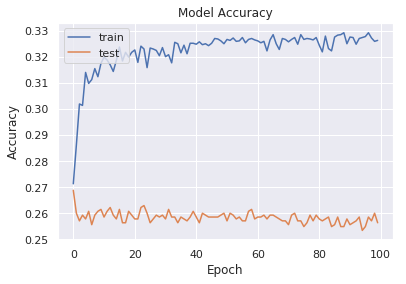

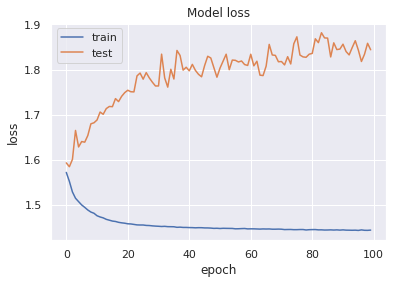

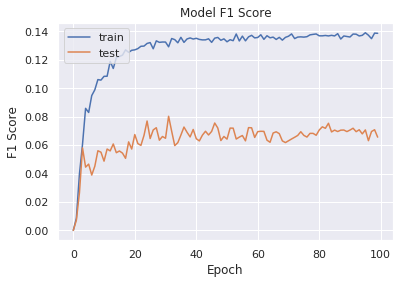

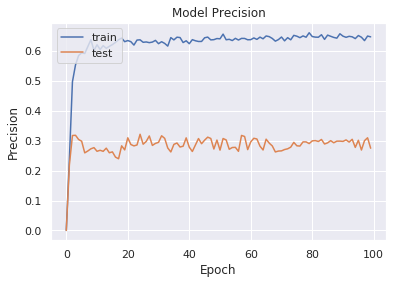

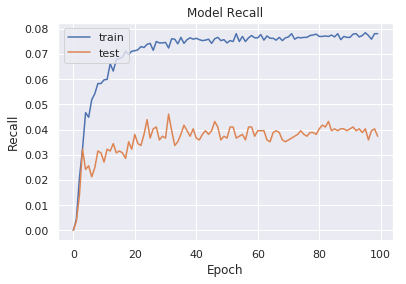

In [29]:
#Plotting Graphs
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])

plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])

plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [0]:
preds = model.predict_classes(X_test, verbose=0)

In [0]:
from sklearn.metrics import classification_report

print(classification_report(X_train, Y_test))

ValueError: ignored